# python imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Data imports

### df - simplified_data 
### df_skills - simplified_data rozdzielone po umiejetnosciach muzycznych
### df_genres - simplified_data rozdzielone po gatunkach
### df_overall - simplified_data (kazde z kazdym)


In [10]:
def load_file(path: str):

    with open(path, 'r',encoding="utf8") as file:
        lines = file.readlines()


    data = []
    for line in lines:
        line = line.strip()
        line = line[2:-2]
        row = line.split("','")
        data.append(row)
    
    dataframe = pd.DataFrame(data[1:], columns=data[0])
    dataframe['age'] = dataframe['age'].astype(int)
    return dataframe

df = load_file('simplified_data.txt')
df_skills = load_file('simplified_data_skills.txt')
df_genres = load_file('simplified_data_genres.txt')
df_overall = load_file('simplified_data_overall.txt')


all_death_causes = set(df['cause_of_death'])
all_skills = set(df_skills['musical_skills'])
all_genres = set(df_genres['genres'])

print(df.head(20))

    gender  age birth_place death_place  cause_of_death  \
0     male   78         USA         USA          cancer   
1     male   85         USA         USA          cancer   
2     male   80         USA         USA          cancer   
3     male   81         USA         USA         illness   
4     male   73          UK          UK          cancer   
5     male   72         USA         USA         illness   
6     male   88       China       Japan   organ failure   
7     male   75         USA         USA          cancer   
8     male   61         USA         USA    heart attack   
9     male   80         USA          UK          cancer   
10    male   79          UK         USA        accident   
11    male   65          UK     Ireland         illness   
12    male   64          UK       Česko          stroke   
13  female   87         USA         USA   organ failure   
14    male   71     Jamaica     Jamaica          cancer   
15    male   84         USA         USA    heart attack 

# Beginning of data exploration



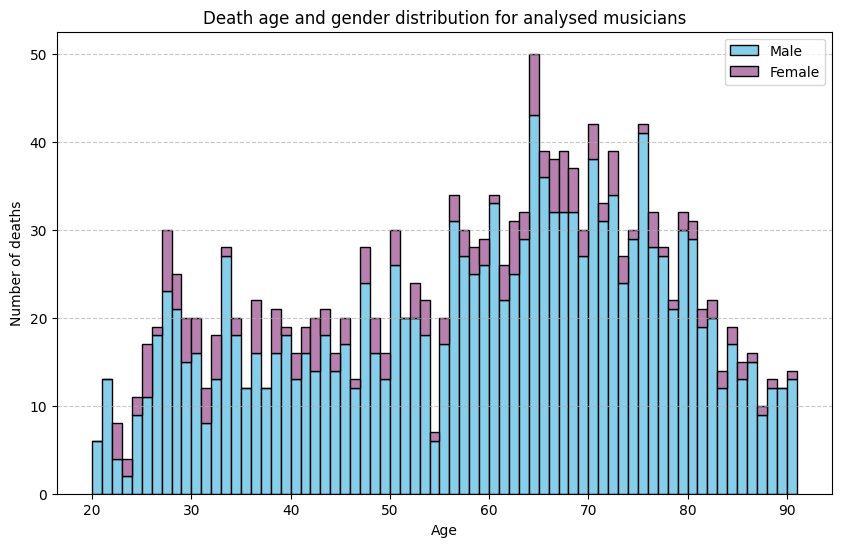

In [11]:

ages = df["age"]
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(10, 6))
plt.hist([ages[df["gender"] == "male"], ages[df["gender"] == "female"]], bins=range(min(ages), max(ages) + 2), stacked=True, color=['#87CEEB', '#b780ae'], edgecolor='black', label=['Male', 'Female'])

plt.title('Death age and gender distribution for analysed musicians')
plt.xlabel('Age')
plt.ylabel('Number of deaths')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


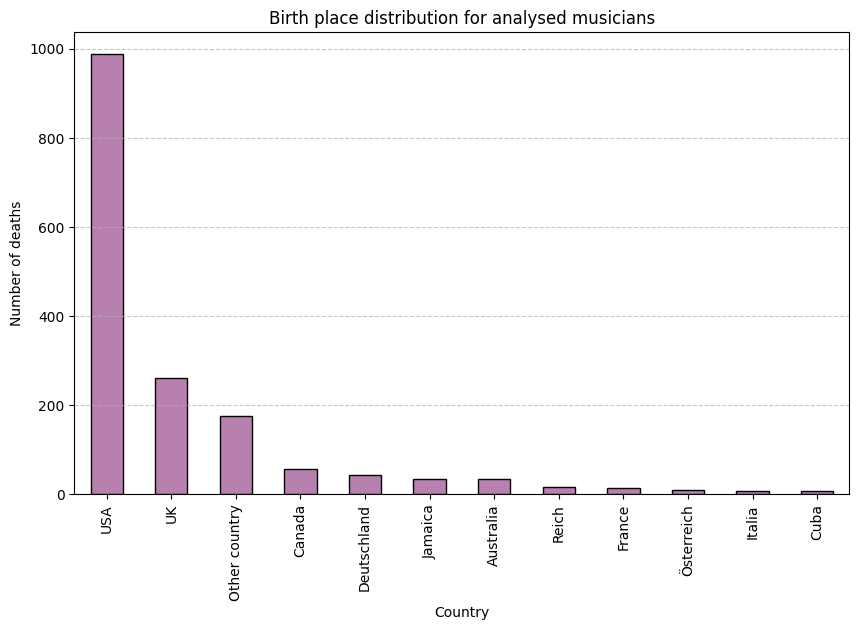

In [12]:
allowed_countries = ["USA", "UK", "Deutschland", "Jamaica", "Canada", "Reich", "Australia", "France", "Österreich", "Cuba", "Italia"]

df['birth_place'] = df['birth_place'].apply(lambda x: x if x in allowed_countries else 'Other country')

plt.figure(figsize=(10, 6))
df['birth_place'].value_counts().plot(kind='bar', edgecolor='black', color='#b780ae')
plt.title('Birth place distribution for analysed musicians')
plt.xlabel('Country')
plt.ylabel('Number of deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

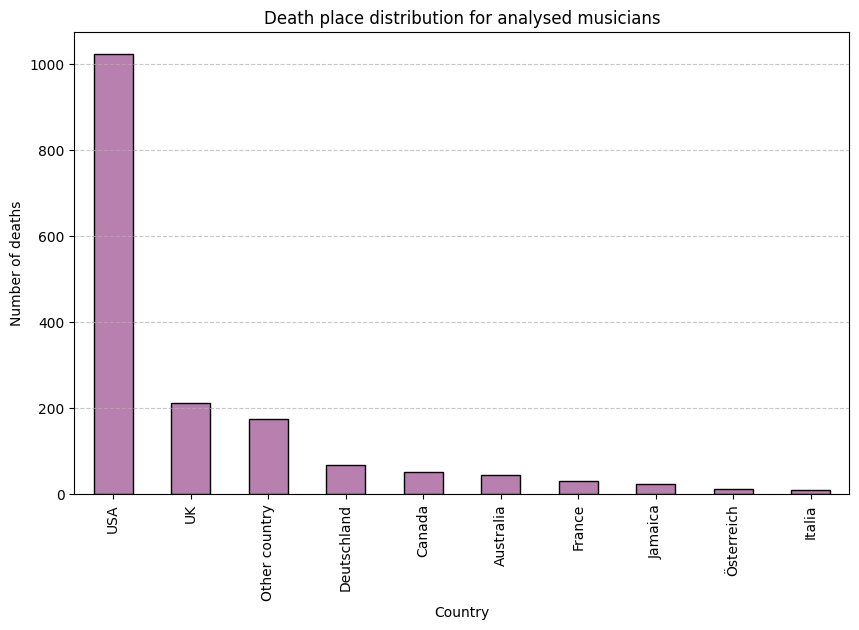

In [13]:
allowed_countries = ["USA", "UK", "Deutschland", "Jamaica", "Canada", "Reich", "Australia", "France", "Österreich", "Cuba", "Italia"]

df['death_place'] = df['death_place'].apply(lambda x: x if x in allowed_countries else 'Other country')

plt.figure(figsize=(10, 6))
df['death_place'].value_counts().plot(kind='bar', edgecolor='black', color='#b780ae')
plt.title('Death place distribution for analysed musicians')
plt.xlabel('Country')
plt.ylabel('Number of deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

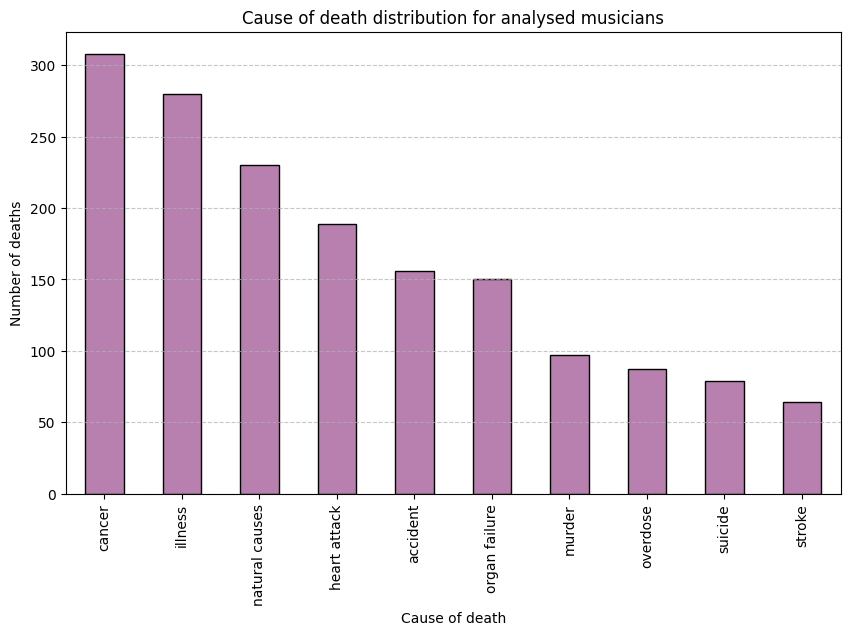

In [14]:
plt.figure(figsize=(10, 6))
df['cause_of_death'].value_counts().plot(kind='bar', edgecolor='black', color='#b780ae')
plt.title('Cause of death distribution for analysed musicians')
plt.xlabel('Cause of death')
plt.ylabel('Number of deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

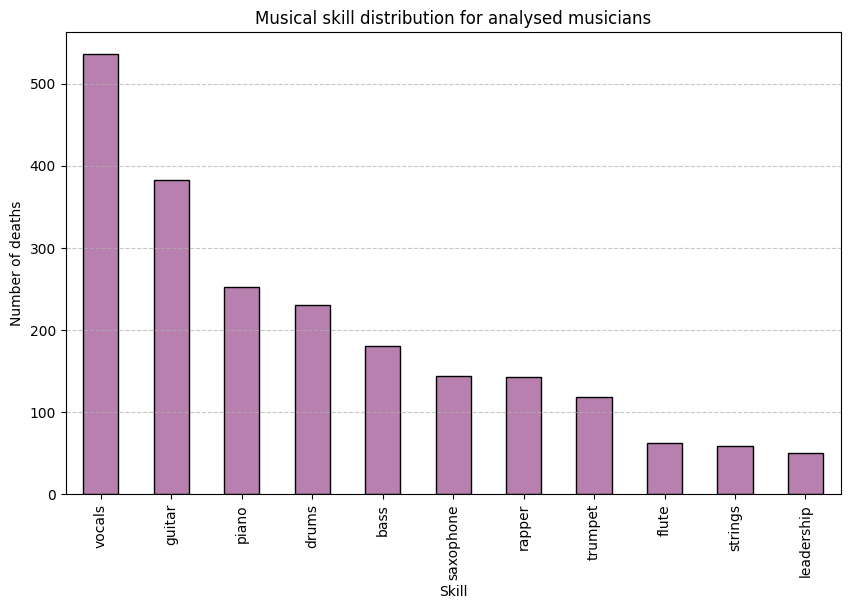

In [15]:
df_copy = df_skills.copy()
df_copy['musical_skills'] = df_copy['musical_skills'].str.split(',')
df_copy = df_copy.explode('musical_skills').reset_index(drop=True)

plt.figure(figsize=(10, 6))
df_copy['musical_skills'].value_counts().plot(kind='bar', edgecolor='black', color='#b780ae')
plt.title('Musical skill distribution for analysed musicians')
plt.xlabel('Skill')
plt.ylabel('Number of deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

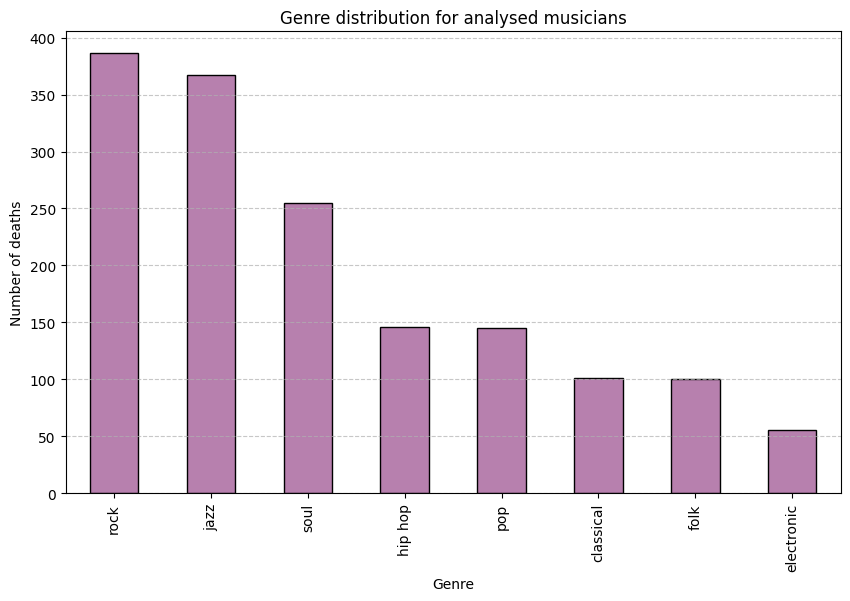

In [16]:
df_copy =  df_genres.copy()

plt.figure(figsize=(10, 6))
df_copy['genres'].value_counts().plot(kind='bar', edgecolor='black', color='#b780ae')
plt.title('Genre distribution for analysed musicians')
plt.xlabel('Genre')
plt.ylabel('Number of deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Data exploration for each cause of death
## The graphs are saved as a png to the provided dir

In [17]:
def plot_graphs(death_cause: str, save_path: str):
    df_death_cause = df[df['cause_of_death'].str.contains(death_cause, case=False, na=False)]

    fig, axs = plt.subplots(1, 3, figsize=(21, 6))


    ages = df_death_cause["age"]
    axs[0].hist(ages, bins=10, edgecolor='black', color='#BBAAC1')
    axs[0].set_title(f'Age distribution ({death_cause})', fontsize=20)
    axs[0].set_xlabel('Age', fontsize=17)
    axs[0].set_ylabel('Frequency', fontsize=17)
    axs[0].tick_params(axis='x', labelsize=15)
    axs[0].grid(axis='y', linestyle='--', alpha=0.7)


    df_death_cause_genres = df_genres[df_genres['cause_of_death'].str.contains(death_cause, case=False, na=False)]
    genre_counts = df_death_cause_genres['genres'].value_counts().reindex(all_genres, fill_value=0).sort_index()
    genre_counts.plot(kind='bar', color='#ce73aa', edgecolor='black', ax=axs[1])
    axs[1].set_title(f'Genre distribution ({death_cause})', fontsize=20)
    axs[1].set_xlabel('Genre', fontsize=17)
    axs[1].set_ylabel('Frequency', fontsize=17)
    axs[1].tick_params(axis='x', labelsize=15)
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
    axs[1].grid(axis='y', linestyle='--', alpha=0.7)


    df_death_cause_skills = df_skills[df_skills['cause_of_death'].str.contains(death_cause, case=False, na=False)]
    skill_counts = df_death_cause_skills['musical_skills'].value_counts().reindex(all_skills, fill_value=0).sort_index()
    skill_counts.plot(kind='bar', color='#D8939B', edgecolor='black', ax=axs[2])
    axs[2].set_title(f'Skill distribution ({death_cause})', fontsize=20)
    axs[2].set_xlabel('Skill', fontsize=17)
    axs[2].set_ylabel('Frequency', fontsize=17)
    axs[2].tick_params(axis='x', labelsize=15)
    axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')
    axs[2].grid(axis='y', linestyle='--', alpha=0.7)


    fig.savefig(f"{save_path}/{death_cause.replace(' ', '_')}_distribution.png", bbox_inches='tight')


    plt.tight_layout()
    plt.close(fig)


for death_cause in all_death_causes:
    plot_graphs(death_cause, "graph_images/death_cause_analysis")


# The failed experiment

Linear Regression - Training Set: RMSE = 0.9269, R^2 = 0.0467
Linear Regression - Testing Set: RMSE = 1.1785, R^2 = -0.1697
Polynomial Regression - Training Set: RMSE = 0.7817, R^2 = 0.322
Polynomial Regression - Testing Set: RMSE = 1.0855, R^2 = 0.0078


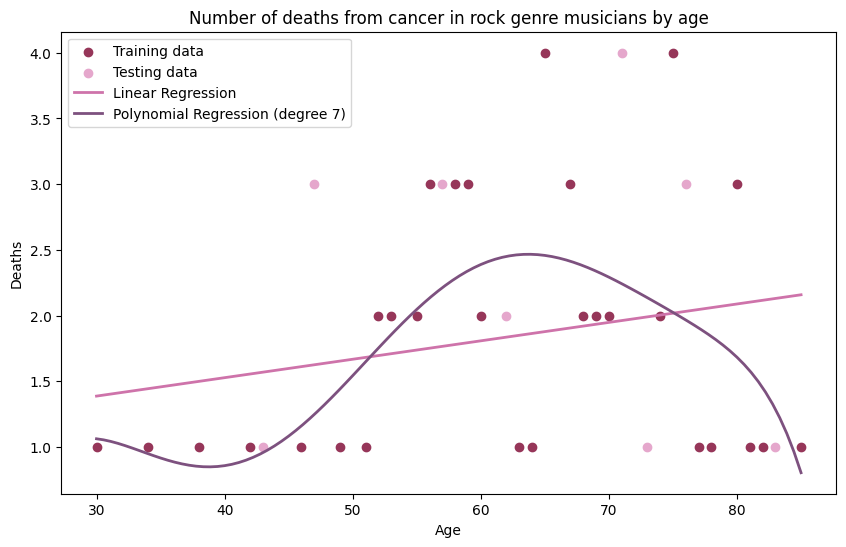

In [297]:
#FAILED EXPERIMENT
chosen_genre = 'rock'
chosen_death_cause = 'cancer'
df_genres_filtered = df_genres[df_genres['genres'].str.contains(chosen_genre, case=False, na=False)]
df_genres_filtered = df_genres_filtered[df_genres_filtered['cause_of_death'].str.contains(chosen_death_cause, case=False, na=False)]
grouped_dataframe = df_genres_filtered.groupby('age').size().reset_index(name='deaths')


x = grouped_dataframe['age'].values.reshape(-1, 1)
y = grouped_dataframe['deaths'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#LINEAR
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

y_train_pred_linear = linear_reg_model.predict(x_train)
y_test_pred_linear = linear_reg_model.predict(x_test)

#POLYNOMIAL
degree = 7 #DEGREE
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train)

y_train_pred_poly = poly_reg_model.predict(x_train_poly)
y_test_pred_poly = poly_reg_model.predict(x_test_poly)


def print_scores(y_true, y_pred, model_name, dataset_type):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - {dataset_type} Set: RMSE = {round(rmse, 4)}, R^2 = {round(r2, 4)}")
    # print(f"Root Mean Squared Error (RMSE): {round(rmse, 4)}")
    # print(f"R^2 Score: {round(r2, 4)}")

print_scores(y_train, y_train_pred_linear, "Linear Regression", "Training")
print_scores(y_test, y_test_pred_linear, "Linear Regression", "Testing")
print_scores(y_train, y_train_pred_poly, "Polynomial Regression", "Training")
print_scores(y_test, y_test_pred_poly, "Polynomial Regression", "Testing")


plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='#963659', label='Training data')
plt.scatter(x_test, y_test, color='#e5a7cc', label='Testing data')
plt.title('Number of deaths from cancer in rock genre musicians by age')
plt.xlabel('Age')
plt.ylabel('Deaths')

#range of x values for plotting the regression lines
x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_fit_linear = linear_reg_model.predict(x_fit)
x_fit_poly = poly_features.transform(x_fit)
y_fit_poly = poly_reg_model.predict(x_fit_poly)

plt.plot(x_fit, y_fit_linear, color='#ce73aa', linestyle='-', linewidth=2, label='Linear Regression')
plt.plot(x_fit, y_fit_poly, color='#7d517f', linestyle='-', linewidth=2, label=f'Polynomial Regression (degree {degree})')

plt.legend()
plt.show()


# The rest of the experiments

Linear Regression - Training Set: RMSE = 4.1543, R^2 = 0.1859
Linear Regression - Testing Set: RMSE = 2.1185, R^2 = 0.4834
Polynomial Regression - Training Set: RMSE = 1.5802, R^2 = 0.8822
Polynomial Regression - Testing Set: RMSE = 0.4669, R^2 = 0.9749


C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\1003235759.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_deaths = df_genres_filtered.groupby(pd.cut(df_genres_filtered['age'], bins=np.arange(0, 100, 5))).size().reset_index(name='deaths')


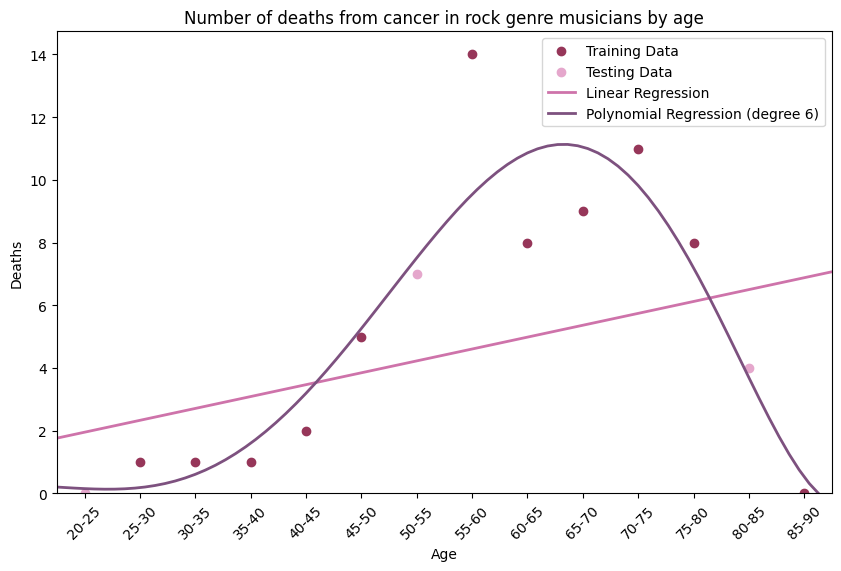

In [298]:
chosen_genre = 'rock'
chosen_death_cause = 'cancer'
df_genres_filtered = df_genres[df_genres['genres'].str.contains(chosen_genre, case=False, na=False)]
df_genres_filtered = df_genres_filtered[df_genres_filtered['cause_of_death'].str.contains(chosen_death_cause, case=False, na=False)]

age_deaths = df_genres_filtered.groupby(pd.cut(df_genres_filtered['age'], bins=np.arange(0, 100, 5))).size().reset_index(name='deaths')


#calculate the midpoint of each age range and assign age range labels - for age grouping!!
age_deaths['age_midpoint'] = age_deaths['age'].apply(lambda x: x.mid)
age_deaths['age_range_label'] = age_deaths['age'].apply(lambda x: f'{int(x.left)}-{int(x.right)}')


x = age_deaths['age_midpoint'].values.reshape(-1, 1)
y = age_deaths['deaths'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)


linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

y_train_pred_linear = linear_reg_model.predict(x_train)
y_test_pred_linear = linear_reg_model.predict(x_test)

degree = 6 #DEGREE
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train)

y_train_pred_poly = poly_reg_model.predict(x_train_poly)
y_test_pred_poly = poly_reg_model.predict(x_test_poly)


def print_scores(y_true, y_pred, model_name, dataset_type):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - {dataset_type} Set: RMSE = {round(rmse, 4)}, R^2 = {round(r2, 4)}")

print_scores(y_train, y_train_pred_linear, "Linear Regression", "Training")
print_scores(y_test, y_test_pred_linear, "Linear Regression", "Testing")
print_scores(y_train, y_train_pred_poly, "Polynomial Regression", "Training")
print_scores(y_test, y_test_pred_poly, "Polynomial Regression", "Testing")


plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='#963659', label='Training Data')
plt.scatter(x_test, y_test, color='#e5a7cc', label='Testing Data')
plt.title('Number of deaths from cancer in rock genre musicians by age')
plt.xlabel('Age')
plt.ylabel('Deaths')

#range of x values for plotting
x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_fit_linear = linear_reg_model.predict(x_fit)
x_fit_poly = poly_features.transform(x_fit)
y_fit_poly = poly_reg_model.predict(x_fit_poly)


plt.plot(x_fit, y_fit_linear, color='#ce73aa', linestyle='-', linewidth=2, label='Linear Regression')
plt.plot(x_fit, y_fit_poly, color='#7d517f', linestyle='-', linewidth=2, label=f'Polynomial Regression (degree {degree})')

#rotation for readability
plt.xticks(age_deaths['age_midpoint'], age_deaths['age_range_label'], rotation=45)


plt.xlim(20, 90)
plt.ylim(0, None)

plt.legend()
plt.show()

Linear Regression - Training Set: RMSE = 1.5448, R^2 = 0.2972
Linear Regression - Testing Set: RMSE = 0.5781, R^2 = 0.5544
Polynomial Regression - Training Set: RMSE = 0.7423, R^2 = 0.8377
Polynomial Regression - Testing Set: RMSE = 0.966, R^2 = -0.2442


C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\2884661174.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_deaths = df_genres_filtered.groupby(pd.cut(df_genres_filtered['age'], bins=np.arange(0, 100, 5))).size().reset_index(name='deaths')


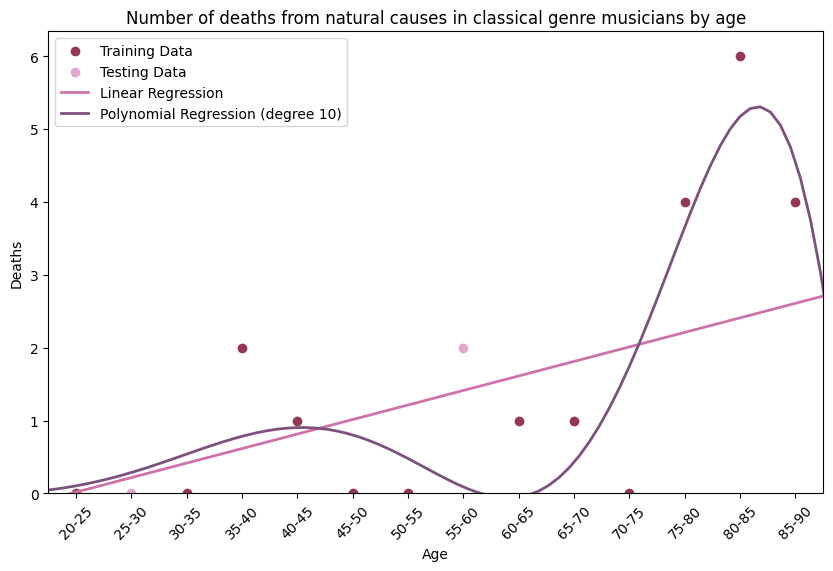

In [299]:
chosen_genre = 'classical'
chosen_death_cause = 'natural causes'
df_genres_filtered = df_genres[df_genres['genres'].str.contains(chosen_genre, case=False, na=False)]
df_genres_filtered = df_genres_filtered[df_genres_filtered['cause_of_death'].str.contains(chosen_death_cause, case=False, na=False)]

age_deaths = df_genres_filtered.groupby(pd.cut(df_genres_filtered['age'], bins=np.arange(0, 100, 5))).size().reset_index(name='deaths')

age_deaths['age_midpoint'] = age_deaths['age'].apply(lambda x: x.mid)
age_deaths['age_range_label'] = age_deaths['age'].apply(lambda x: f'{int(x.left)}-{int(x.right)}')


x = age_deaths['age_midpoint'].values.reshape(-1, 1)
y = age_deaths['deaths'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)


y_train_pred_linear = linear_reg_model.predict(x_train)
y_test_pred_linear = linear_reg_model.predict(x_test)


##########################################
degree = 10  # Degree of the polynomial
##########################################

poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train)

y_train_pred_poly = poly_reg_model.predict(x_train_poly)
y_test_pred_poly = poly_reg_model.predict(x_test_poly)


def print_scores(y_true, y_pred, model_name, dataset_type):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - {dataset_type} Set: RMSE = {round(rmse, 4)}, R^2 = {round(r2, 4)}")

print_scores(y_train, y_train_pred_linear, "Linear Regression", "Training")
print_scores(y_test, y_test_pred_linear, "Linear Regression", "Testing")
print_scores(y_train, y_train_pred_poly, "Polynomial Regression", "Training")
print_scores(y_test, y_test_pred_poly, "Polynomial Regression", "Testing")


plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='#963659', label='Training Data')
plt.scatter(x_test, y_test, color='#e5a7cc', label='Testing Data')
plt.title(f'Number of deaths from {chosen_death_cause} in {chosen_genre} genre musicians by age')
plt.xlabel('Age')
plt.ylabel('Deaths')


x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_fit_linear = linear_reg_model.predict(x_fit)
x_fit_poly = poly_features.transform(x_fit)
y_fit_poly = poly_reg_model.predict(x_fit_poly)


plt.plot(x_fit, y_fit_linear, color='#ce73aa', linestyle='-', linewidth=2, label='Linear Regression')
plt.plot(x_fit, y_fit_poly, color='#7d517f', linestyle='-', linewidth=2, label=f'Polynomial Regression (degree {degree})')


plt.xticks(age_deaths['age_midpoint'], age_deaths['age_range_label'], rotation=45)
plt.xlim(20, 90)
plt.ylim(0, None)

plt.legend()
plt.show()


Linear Regression - Training Set: RMSE = 4.8028, R^2 = 0.1464
Linear Regression - Testing Set: RMSE = 5.1186, R^2 = 0.3531
Polynomial Regression - Training Set: RMSE = 1.1845, R^2 = 0.9481
Polynomial Regression - Testing Set: RMSE = 1.6843, R^2 = 0.93


C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\3954927372.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_deaths = df_skills_filtered.groupby(pd.cut(df_skills_filtered['age'], bins=np.arange(0, 100, 5))).size().reset_index(name='deaths')


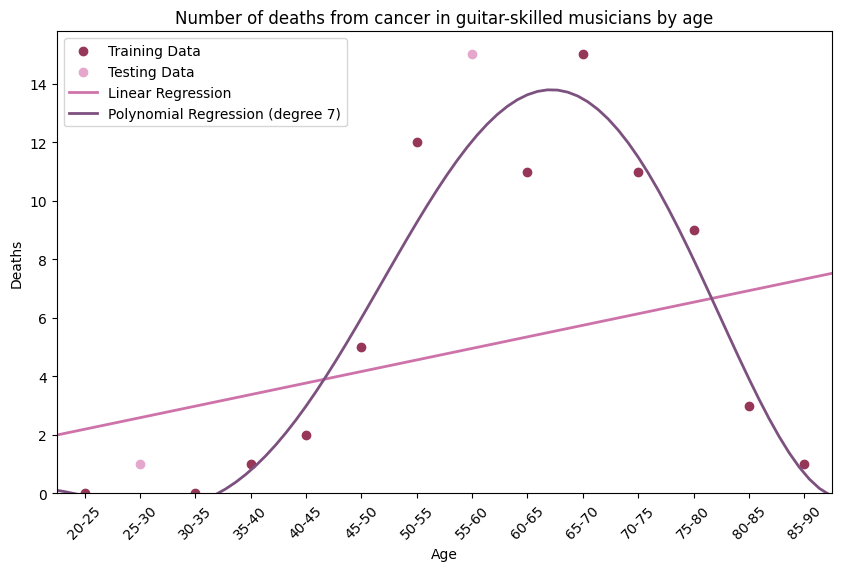

In [300]:
chosen_skill = 'guitar'
chosen_death_cause = 'cancer'
df_skills_filtered = df_skills[df_skills['musical_skills'].str.contains(chosen_skill, case=False, na=False)]
df_skills_filtered = df_skills_filtered[df_skills_filtered['cause_of_death'].str.contains(chosen_death_cause, case=False, na=False)]

age_deaths = df_skills_filtered.groupby(pd.cut(df_skills_filtered['age'], bins=np.arange(0, 100, 5))).size().reset_index(name='deaths')


age_deaths['age_midpoint'] = age_deaths['age'].apply(lambda x: x.mid)
age_deaths['age_range_label'] = age_deaths['age'].apply(lambda x: f'{int(x.left)}-{int(x.right)}')


x = age_deaths['age_midpoint'].values.reshape(-1, 1)
y = age_deaths['deaths'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

y_train_pred_linear = linear_reg_model.predict(x_train)
y_test_pred_linear = linear_reg_model.predict(x_test)

##########################################
degree = 7  # Degree of the polynomial
##########################################

poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train)

y_train_pred_poly = poly_reg_model.predict(x_train_poly)
y_test_pred_poly = poly_reg_model.predict(x_test_poly)


def print_scores(y_true, y_pred, model_name, dataset_type):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - {dataset_type} Set: RMSE = {round(rmse, 4)}, R^2 = {round(r2, 4)}")

print_scores(y_train, y_train_pred_linear, "Linear Regression", "Training")
print_scores(y_test, y_test_pred_linear, "Linear Regression", "Testing")
print_scores(y_train, y_train_pred_poly, "Polynomial Regression", "Training")
print_scores(y_test, y_test_pred_poly, "Polynomial Regression", "Testing")


plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='#963659', label='Training Data')
plt.scatter(x_test, y_test, color='#e5a7cc', label='Testing Data')
plt.title(f'Number of deaths from {chosen_death_cause} in {chosen_skill}-skilled musicians by age')
plt.xlabel('Age')
plt.ylabel('Deaths')


x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_fit_linear = linear_reg_model.predict(x_fit)
x_fit_poly = poly_features.transform(x_fit)
y_fit_poly = poly_reg_model.predict(x_fit_poly)


plt.plot(x_fit, y_fit_linear, color='#ce73aa', linestyle='-', linewidth=2, label='Linear Regression')
plt.plot(x_fit, y_fit_poly, color='#7d517f', linestyle='-', linewidth=2, label=f'Polynomial Regression (degree {degree})')


plt.xticks(age_deaths['age_midpoint'], age_deaths['age_range_label'], rotation=45)
plt.xlim(20, 90)
plt.ylim(0, None)

plt.legend()
plt.show()


# Heatmaps

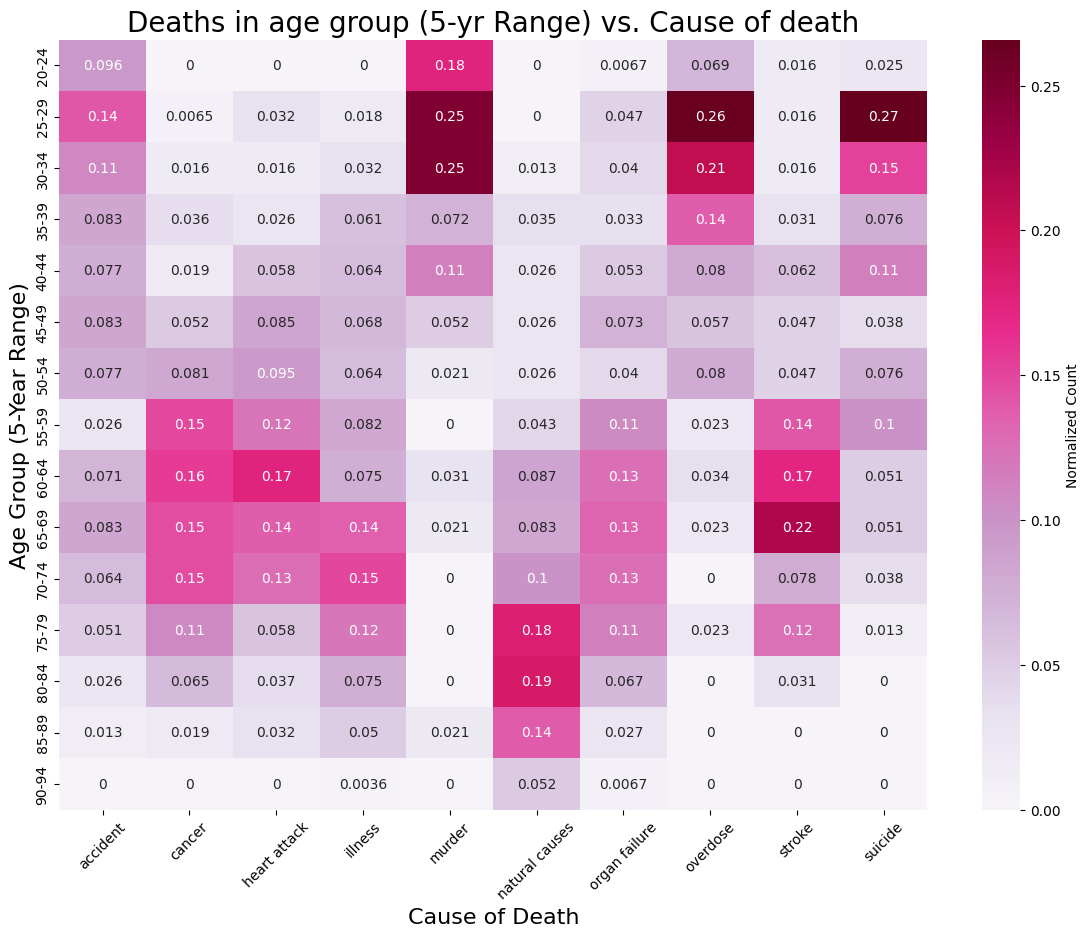

In [302]:
#bins and labels
bins = list(range(0, 101, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#crosstab
crosstab_age_cause = pd.crosstab(df['age_group'], df['cause_of_death'])

#normalisation - dividing each cell by the sum of its column
crosstab_age_cause_normalized = crosstab_age_cause.div(crosstab_age_cause.sum(axis=0), axis=1)


plt.figure(figsize=(14, 10))
sns.heatmap(crosstab_age_cause_normalized, annot=True, cmap='PuRd', cbar_kws={'label': 'Normalized Count'})
plt.title('Deaths in age group (5-yr Range) vs. Cause of death', fontsize=20)
plt.xlabel('Cause of Death', fontsize=16)
plt.ylabel('Age Group (5-Year Range)', fontsize=16)
plt.tick_params(axis='x', labelrotation=45)
plt.show()

C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\2205384730.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_combined.groupby('age_group').apply(lambda x: x[skills_dummies.columns].sum()).reset_index()
C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\2205384730.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df_combined.groupby('age_group').apply(lambda x: x[skills_dummies.columns].sum()).reset_index()


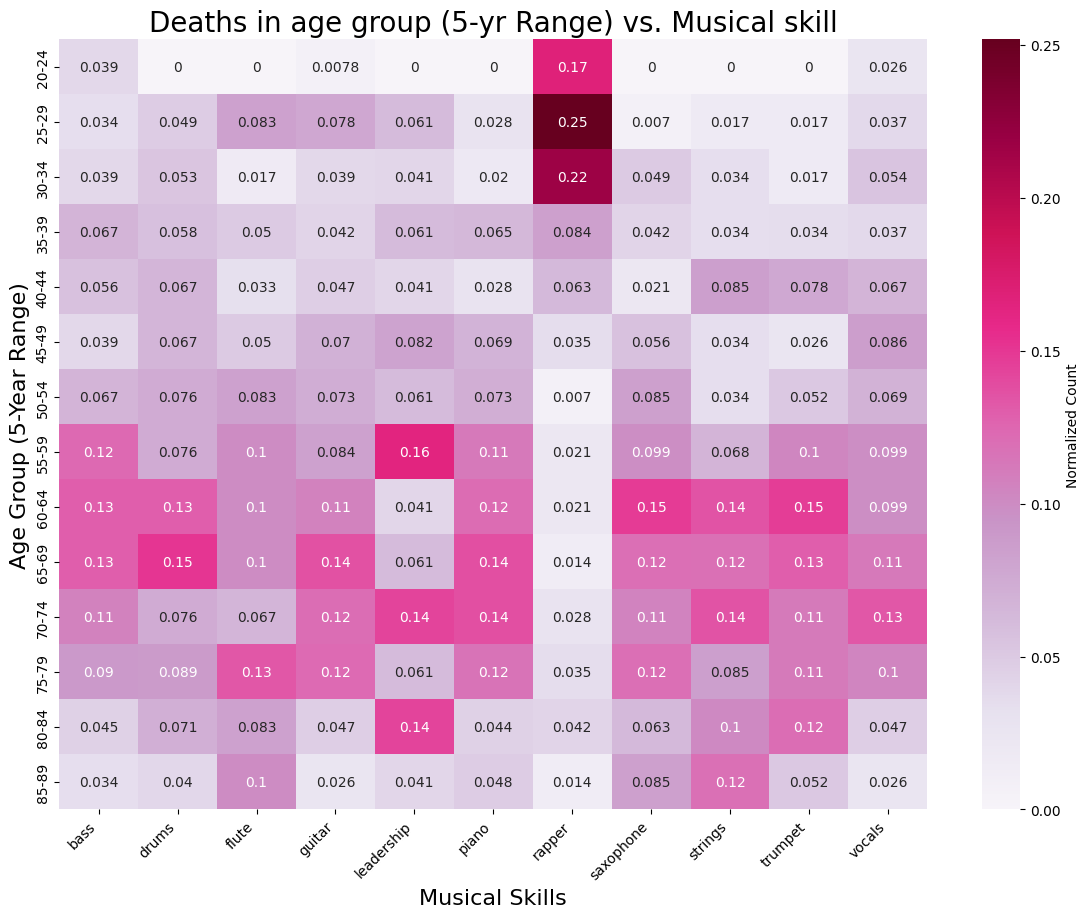

In [303]:
skills_dummies = df['musical_skills'].str.get_dummies(sep=',')

bins = list(range(20, 95, 5)) #bins
labels = [f'{i}-{i+4}' for i in bins[:-1]]  #labels
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#original data combined with the one-hot encoded data
df_combined = pd.concat([df, skills_dummies], axis=1)

grouped_df = df_combined.groupby('age_group').apply(lambda x: x[skills_dummies.columns].sum()).reset_index()

#normalize the counts in each skill column by dividing by the sum of counts for that skill
#in all age groups
for col in skills_dummies.columns:
    grouped_df[col] = grouped_df[col] / grouped_df[col].sum()


plt.figure(figsize=(14, 10))
sns.heatmap(grouped_df.set_index('age_group'), annot=True, cmap='PuRd', cbar_kws={'label': 'Normalized Count'})
plt.title('Deaths in age group (5-yr Range) vs. Musical skill', fontsize=20)
plt.xlabel('Musical Skills', fontsize=16)
plt.ylabel('Age Group (5-Year Range)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\3745131996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)
C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\3745131996.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_combined.groupby('age_group').apply(lambda x: x[genres_dummies.columns].sum()).reset_index()
C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\3745131996.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the gr

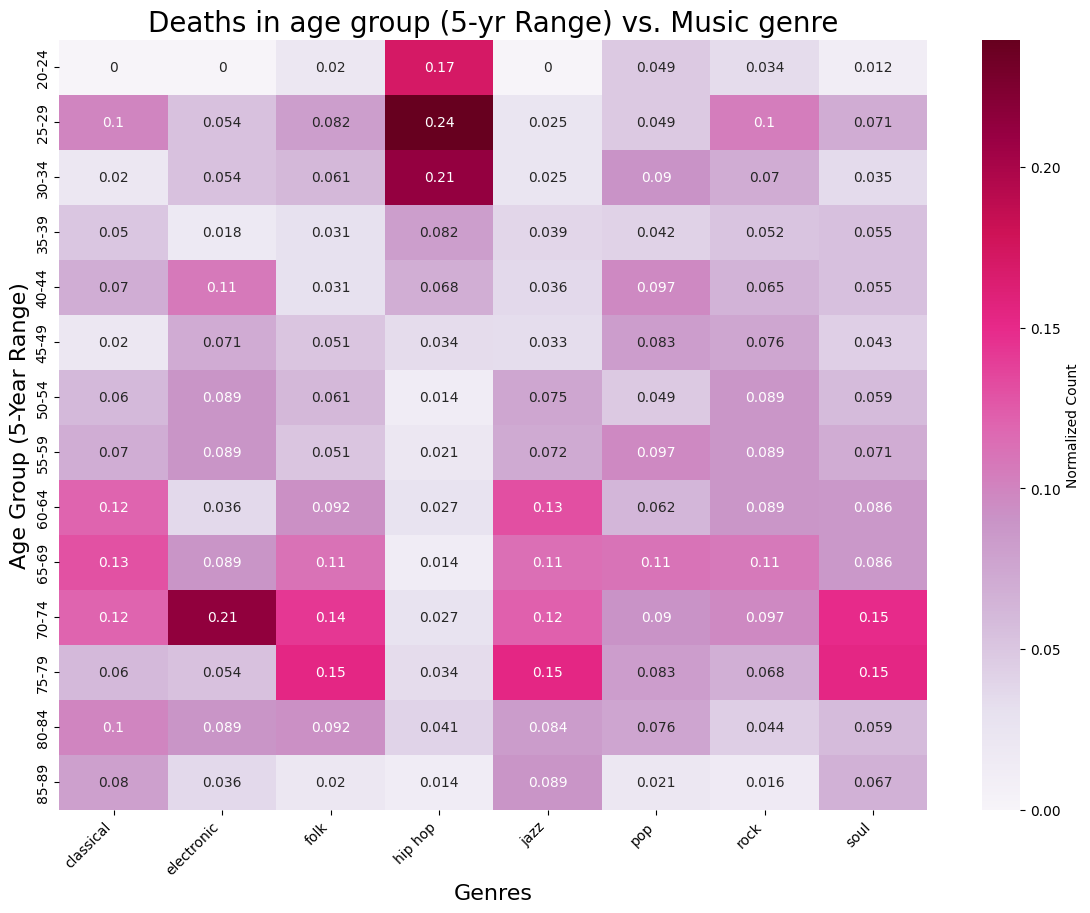

In [304]:

df_filtered = df[df['genres'] != 'n.a.']

#One-Hot Encode
genres_dummies = df_filtered['genres'].str.get_dummies(sep=',')

bins = list(range(20, 95, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)

df_combined = pd.concat([df_filtered, genres_dummies], axis=1)

grouped_df = df_combined.groupby('age_group').apply(lambda x: x[genres_dummies.columns].sum()).reset_index()

for col in genres_dummies.columns:
    grouped_df[col] = grouped_df[col] / grouped_df[col].sum()

plt.figure(figsize=(14, 10))
sns.heatmap(grouped_df.set_index('age_group'), annot=True, cmap='PuRd', cbar_kws={'label': 'Normalized Count'})
plt.title('Deaths in age group (5-yr Range) vs. Music genre', fontsize=20)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Age Group (5-Year Range)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\2362585657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vocals['age_group'] = pd.cut(df_vocals['age'], bins=range(20, 95, 5))
C:\Users\natalka\AppData\Local\Temp\ipykernel_18152\2362585657.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_vocals.groupby(['age_group', 'cause_of_death']).size().unstack(fill_value=0)


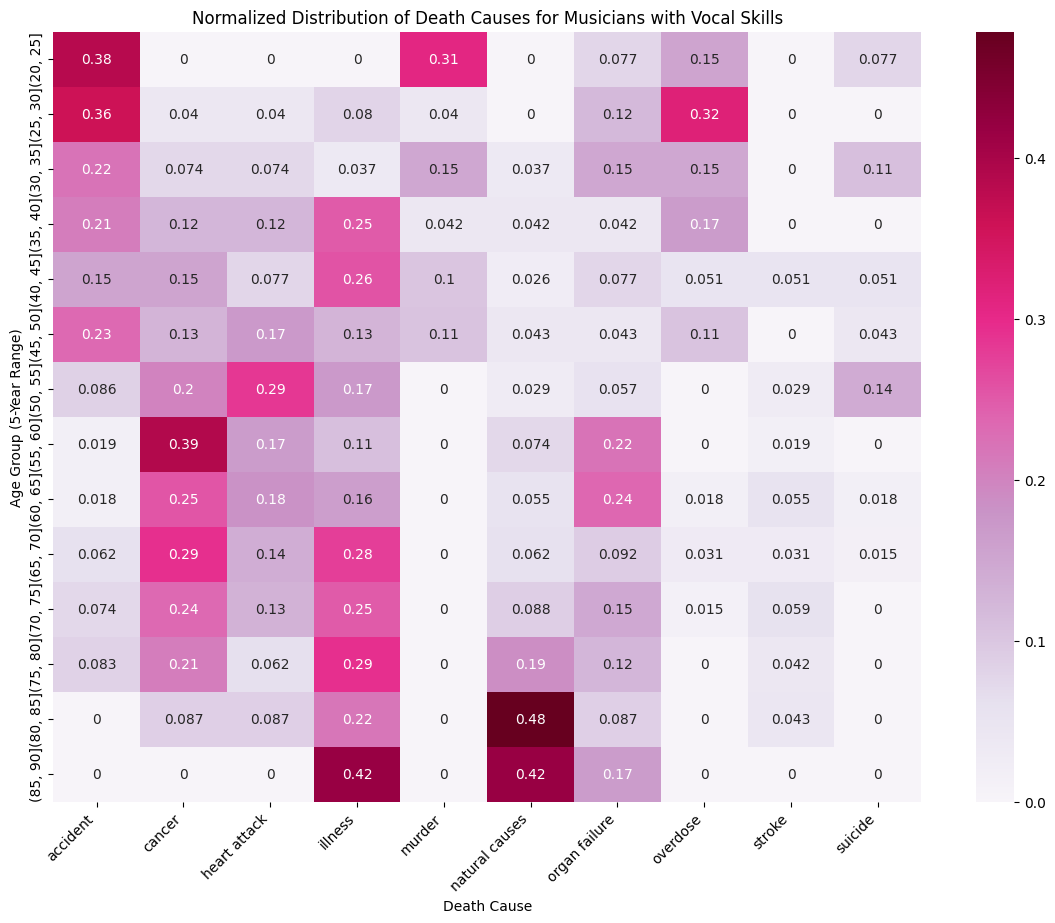

In [305]:
df_vocals = df[df['musical_skills'].str.contains('vocals', case=False, na=False)]

df_vocals['age_group'] = pd.cut(df_vocals['age'], bins=range(20, 95, 5))

grouped_df = df_vocals.groupby(['age_group', 'cause_of_death']).size().unstack(fill_value=0)

grouped_df_normalized = grouped_df.div(grouped_df.sum(axis=1), axis=0)

plt.figure(figsize=(14, 10))
sns.heatmap(grouped_df_normalized, annot=True, cmap='PuRd')
plt.title('Normalized Distribution of Death Causes for Musicians with Vocal Skills')
plt.xlabel('Death Cause')
plt.ylabel('Age Group (5-Year Range)')
plt.xticks(rotation=45, ha='right')
plt.show()

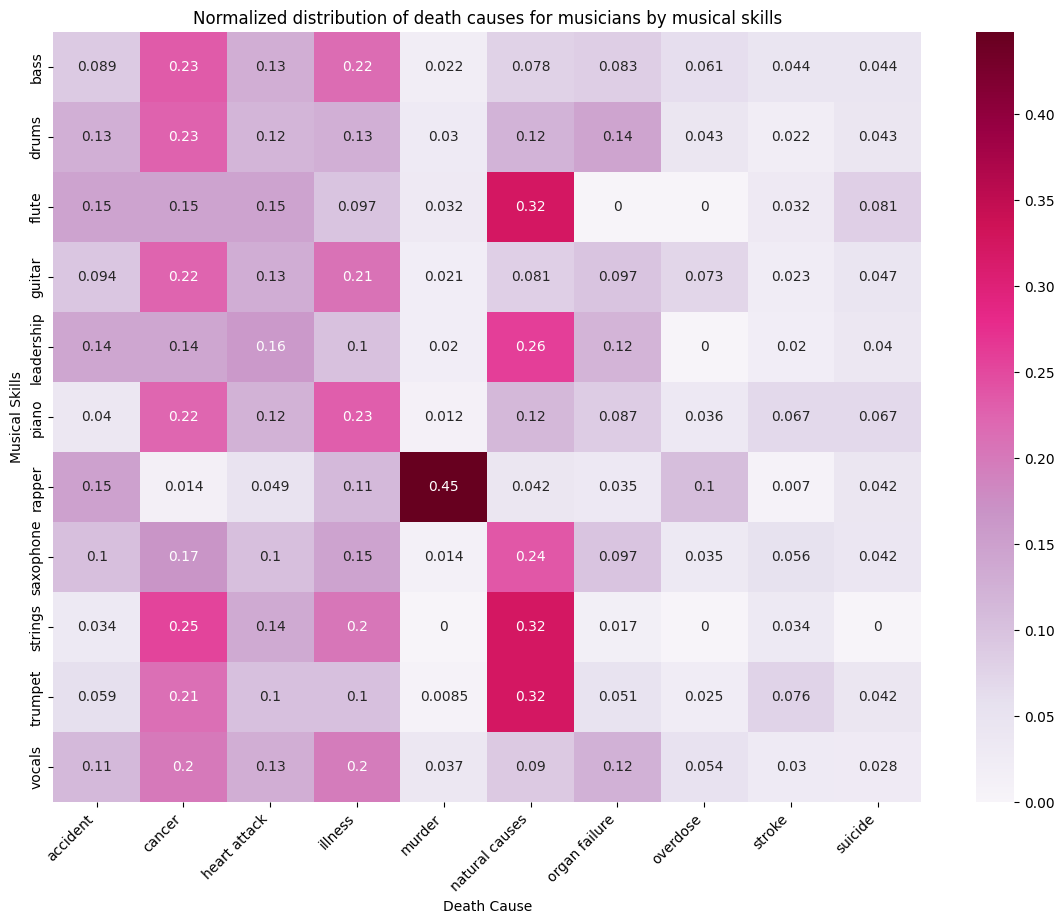

In [260]:
grouped_df = df_skills.groupby(['musical_skills', 'cause_of_death']).size().unstack(fill_value=0)

grouped_df_normalized = grouped_df.div(grouped_df.sum(axis=1), axis=0)


plt.figure(figsize=(14, 10))
sns.heatmap(grouped_df_normalized, annot=True, cmap='PuRd')
plt.title('Normalized distribution of death causes for musicians by musical skills')
plt.xlabel('Death Cause')
plt.ylabel('Musical Skills')
plt.xticks(rotation=45, ha='right')
plt.show()

# The model from chapter 4 of the report is located in model_testing.ipynb